In [1]:
%matplotlib inline
import glob, os, pandas as pd, numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 10
directory = '/Volumes/Kikuchi-SSD/150701F3-muNS-Per2/F3-muNS-30deg-M9glycas-0.2mMIPTG1h-bin2-TxRed300-GFP500-1minint_1/Python_Processed/'
os.chdir(directory)

In [2]:
lindf = pd.DataFrame
contentlist = []
for path in glob.glob("LineageData/lineagedata_*.csv"):
    df = pd.read_csv(path,header=0)
    contentlist.append(df)
    lindf = pd.concat(contentlist)

In [3]:
lindf = lindf.drop(lindf.columns[0], axis=1)

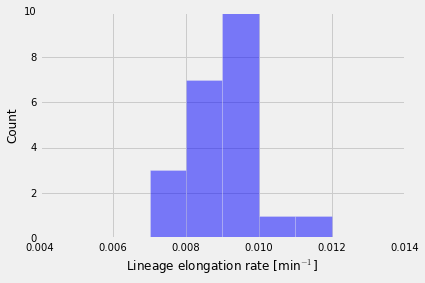

In [4]:
ax= lindf.Lineage_Elongation_Rate.hist(color = 'blue', alpha= 0.5,bins=np.arange(0,0.014,0.001))
ax.set_xlabel(r'Lineage elongation rate [min$^{-1}$]')
ax.set_ylabel('Count')
#ax.grid(False)
axes = plt.gca()
axes.set_xlim([0.004,0.014])
plt.tight_layout()
plt.savefig(directory+'/Graphs/Total_Analysis/LineageERHistogram.pdf')

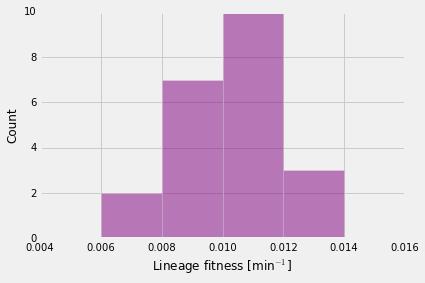

In [67]:
ax= lindf.Lineage_Fitness.hist(color = 'purple', alpha= 0.5,bins=np.arange(0.004,0.015,0.002))
ax.set_xlabel(r'Lineage fitness [min$^{-1}$]')
ax.set_ylabel('Count')
#ax.grid(False)
axes = plt.gca()
axes.set_xlim([0.004,0.016])
plt.tight_layout()
plt.savefig(directory+'/Graphs/Total_Analysis/LineageFitnessHistogram.pdf')

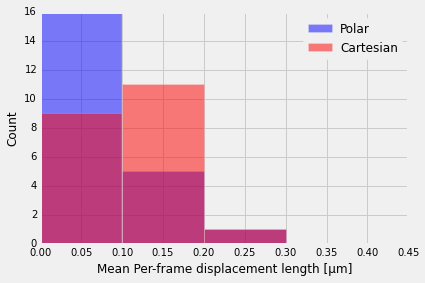

In [68]:
ax1 = lindf.Mean_Polar_Displacement.hist(bins=np.arange(0,0.5,0.1),color='blue', label='Polar',alpha=0.5)
ax1.set_yscale('linear')
ax1.set_ylabel('Count')
ax1.set_xlabel('Mean Per-frame displacement length [µm]')
lindf.Mean_Cartesian_Displacement.hist(bins=np.arange(0,0.5,0.1),color='red',label = 'Cartesian', alpha=0.5, ax=ax1)
#ax1.grid(False)
ax1.legend(loc='upper right')
plt.tight_layout()
plt.savefig(directory+'/Graphs/Total_Analysis/LineageDisplacementHistogram.pdf')

/Users/kaito/.pyenv/versions/anaconda3-2.0.1/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


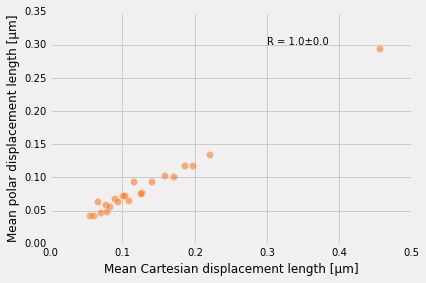

In [5]:
ax = lindf.plot(kind='scatter', x = 'Mean_Cartesian_Displacement', y = 'Mean_Polar_Displacement',alpha=0.5, color = '#ff6600', s =50)
corr = lindf.Mean_Cartesian_Displacement.corr(lindf.Mean_Polar_Displacement)
corrstder = ((1-(lindf.Mean_Cartesian_Displacement.corr(lindf.Mean_Polar_Displacement))**2)/len(lindf))**(0.5)
ax.annotate('R = %.1f'%corr + '±%.1f'%corrstder,  (0.3,0.3))
ax.set_ylabel('Mean polar displacement length [µm]')
ax.set_xlabel('Mean Cartesian displacement length [µm]')
#for i, txt in enumerate(lindf.ID):
 #   ax.annotate(txt, (lindf.Mean_Cartesian_Displacement.iloc[i],lindf.Mean_Polar_Displacement.iloc[i]))

axes = plt.gca()
#axes.set_ylim([0.006,0.012])
#axes.set_xlim([0.004,0.015])
plt.tight_layout()

plt.savefig(directory+'/Graphs/Total_Analysis/LineageMeanPolar-LineageMeanCart-Scatter.pdf')

/Users/kaito/.pyenv/versions/anaconda3-2.0.1/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


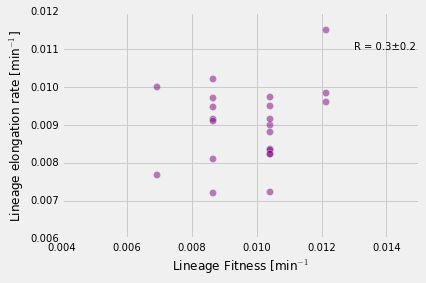

In [70]:
ax = lindf.plot(kind='scatter', x = 'Lineage_Fitness', y = 'Lineage_Elongation_Rate',alpha=0.5, color = 'purple', s =50)
corr = lindf.Lineage_Elongation_Rate.corr(lindf.Lineage_Fitness)
corrstder = ((1-(lindf.Lineage_Elongation_Rate.corr(lindf.Lineage_Fitness))**2)/len(lindf))**(0.5)
ax.annotate('R = %.1f'%corr + '±%.1f'%corrstder,  (0.013,0.011))
ax.set_ylabel(r'Lineage elongation rate [min$^{-1}$]')
ax.set_xlabel(r"Lineage Fitness [min$^{-1}$")

#ax.grid(False)
axes = plt.gca()
axes.set_ylim([0.006,0.012])
axes.set_xlim([0.004,0.015])
plt.tight_layout()
plt.savefig(directory+'/Graphs/Total_Analysis/LineageER-LineageFitness-Scatter.pdf')

/Users/kaito/.pyenv/versions/anaconda3-2.0.1/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


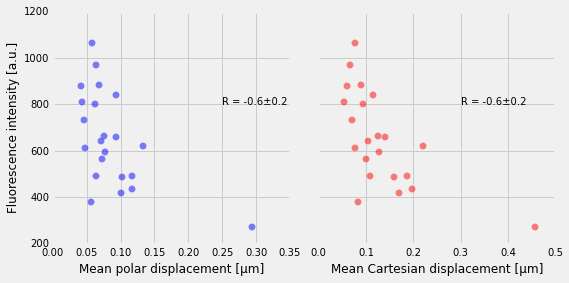

In [71]:
fig, axes = plt.subplots(nrows=1, ncols=2,sharey=True)
lindf.plot(kind='scatter', y = 'Fluorescence_Intensity', x = 'Mean_Polar_Displacement',alpha=0.5, color = 'blue', s =50,ax=axes[0],figsize=(8,4))
corr = lindf.Fluorescence_Intensity.corr(lindf.Mean_Polar_Displacement)
corrstder = ((1-(lindf.Fluorescence_Intensity.corr(lindf.Mean_Polar_Displacement))**2)/len(lindf))**(0.5)
axes[0].annotate('R = %.1f'%corr + '±%.1f'%corrstder,  (0.25,800))
axes[0].set_xlabel('Mean polar displacement [µm]')
axes[0].set_ylabel("Fluorescence intensity [a.u.]")

lindf.plot(kind='scatter', y = 'Fluorescence_Intensity', x = 'Mean_Cartesian_Displacement',alpha=0.5, color = 'red', s =50,ax=axes[1])
axes[1].set_xlabel('Mean Cartesian displacement [µm]')
corr1 = lindf.Fluorescence_Intensity.corr(lindf.Mean_Cartesian_Displacement)
corrstder1 = ((1-(lindf.Fluorescence_Intensity.corr(lindf.Mean_Cartesian_Displacement))**2)/len(lindf))**(0.5)
axes[1].annotate('R = %.1f'%corr1 + '±%.1f'%corrstder1,  (0.3,800))
#ax.grid(False)
#axes = plt.gca()
#axes[0].set_xlim([0.006,0.012])
#axes[1].set_xlim([0.006,0.014])
plt.tight_layout()
plt.savefig(directory+'/Graphs/Total_Analysis/Lineage-Fluor-MeanPolar-MeanCart-Scatter.pdf')

/Users/kaito/.pyenv/versions/anaconda3-2.0.1/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


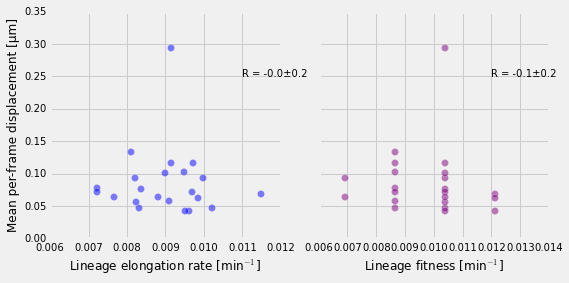

In [72]:
fig, axes = plt.subplots(nrows=1, ncols=2,sharey=True)
lindf.plot(kind='scatter', y = 'Mean_Polar_Displacement', x = 'Lineage_Elongation_Rate',alpha=0.5, color = 'blue', s =50,ax=axes[0],figsize=(8,4))
corr = lindf.Lineage_Elongation_Rate.corr(lindf.Mean_Polar_Displacement)
corrstder = ((1-(lindf.Lineage_Elongation_Rate.corr(lindf.Mean_Polar_Displacement))**2)/len(lindf))**(0.5)
axes[0].annotate('R = %.1f'%corr + '±%.1f'%corrstder,  (0.011,0.25))
axes[0].set_xlabel(r'Lineage elongation rate [min$^{-1}$]')
axes[0].set_ylabel("Mean per-frame displacement [µm]")

lindf.plot(kind='scatter', y = 'Mean_Polar_Displacement', x = 'Lineage_Fitness',alpha=0.5, color = 'purple', s =50,ax=axes[1])
axes[1].set_xlabel(r'Lineage fitness [min$^{-1}$]')
corr1 = lindf.Lineage_Fitness.corr(lindf.Mean_Polar_Displacement)
corrstder1 = ((1-(lindf.Lineage_Fitness.corr(lindf.Mean_Polar_Displacement))**2)/len(lindf))**(0.5)
axes[1].annotate('R = %.1f'%corr1 + '±%.1f'%corrstder1,  (0.012,0.25))
#ax.grid(False)
#axes = plt.gca()
axes[0].set_xlim([0.006,0.012])
axes[1].set_xlim([0.006,0.014])
plt.tight_layout()
plt.savefig(directory+'/Graphs/Total_Analysis/Lineage-ER_Fit-MeanPolar-Scatter.pdf')

/Users/kaito/.pyenv/versions/anaconda3-2.0.1/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


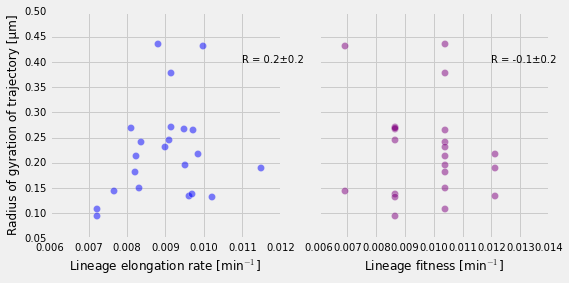

In [73]:
fig, axes = plt.subplots(nrows=1, ncols=2,sharey=True)
lindf.plot(kind='scatter', y = 'Radius_Gyration', x = 'Lineage_Elongation_Rate',alpha=0.5, color = 'blue', s =50,ax=axes[0],figsize=(8,4))
corr = lindf.Lineage_Elongation_Rate.corr(lindf.Radius_Gyration)
corrstder = ((1-(lindf.Lineage_Elongation_Rate.corr(lindf.Radius_Gyration))**2)/len(lindf))**(0.5)
axes[0].annotate('R = %.1f'%corr + '±%.1f'%corrstder,  (0.011,0.4))
axes[0].set_xlabel(r'Lineage elongation rate [min$^{-1}$]')
axes[0].set_ylabel("Radius of gyration of trajectory [µm]")

lindf.plot(kind='scatter', y = 'Radius_Gyration', x = 'Lineage_Fitness',alpha=0.5, color = 'purple', s =50,ax=axes[1])
axes[1].set_xlabel(r'Lineage fitness [min$^{-1}$]')
corr1 = lindf.Lineage_Fitness.corr(lindf.Radius_Gyration)
corrstder1 = ((1-(lindf.Lineage_Fitness.corr(lindf.Radius_Gyration))**2)/len(lindf))**(0.5)
axes[1].annotate('R = %.1f'%corr1 + '±%.1f'%corrstder1,  (0.012,0.4))
#ax.grid(False)
#axes = plt.gca()
axes[0].set_xlim([0.006,0.012])
axes[1].set_xlim([0.006,0.014])
plt.tight_layout()
plt.savefig(directory+'/Graphs/Total_Analysis/Lineage-ER_Fit-RadGyr-Scatter.pdf')

/Users/kaito/.pyenv/versions/anaconda3-2.0.1/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


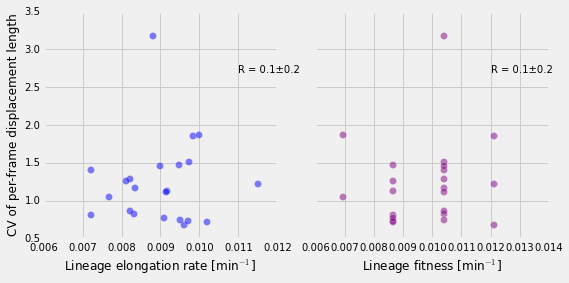

In [74]:
fig, axes = plt.subplots(nrows=1, ncols=2,sharey=True)
lindf.plot(kind='scatter', y = 'CV_Polar_Displacement', x = 'Lineage_Elongation_Rate',alpha=0.5, color = 'blue', s =50,ax=axes[0],figsize=(8,4))
corr = lindf.Lineage_Elongation_Rate.corr(lindf.CV_Polar_Displacement)
corrstder = ((1-(lindf.Lineage_Elongation_Rate.corr(lindf.CV_Polar_Displacement))**2)/len(lindf))**(0.5)
axes[0].annotate('R = %.1f'%corr + '±%.1f'%corrstder,  (0.011,2.7))
axes[0].set_xlabel(r'Lineage elongation rate [min$^{-1}$]')
axes[0].set_ylabel("CV of per-frame displacement length ")

lindf.plot(kind='scatter', y = 'CV_Polar_Displacement', x = 'Lineage_Fitness',alpha=0.5, color = 'purple', s =50,ax=axes[1])
axes[1].set_xlabel(r'Lineage fitness [min$^{-1}$]')
corr1 = lindf.Lineage_Fitness.corr(lindf.CV_Polar_Displacement)
corrstder1 = ((1-(lindf.Lineage_Fitness.corr(lindf.CV_Polar_Displacement))**2)/len(lindf))**(0.5)
axes[1].annotate('R = %.1f'%corr1 + '±%.1f'%corrstder1,  (0.012,2.7))
#ax.grid(False)
#axes = plt.gca()
axes[0].set_xlim([0.006,0.012])
axes[1].set_xlim([0.006,0.014])
plt.tight_layout()
plt.savefig(directory+'/Graphs/Total_Analysis/Lineage-ER_Fit-CVPolar-Scatter.pdf')

/Users/kaito/.pyenv/versions/anaconda3-2.0.1/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


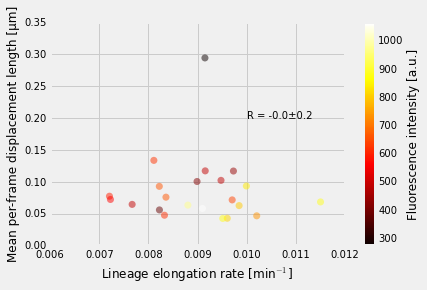

In [75]:
import matplotlib.cm as cm
fig, ax = plt.subplots(1,1)
ax.scatter( lindf.Lineage_Elongation_Rate,lindf.Mean_Polar_Displacement,alpha=0.5,c = lindf.Fluorescence_Intensity, cmap =cm.hot,s=50, edgecolor ='None')
corr = lindf.Lineage_Elongation_Rate.corr(lindf.Mean_Polar_Displacement)
corrstder = ((1-(lindf.Lineage_Elongation_Rate.corr(lindf.Mean_Polar_Displacement))**2)/len(lindf))**(0.5)
sm = plt.cm.ScalarMappable(cmap=cm.hot)
sm.set_array(lindf.Fluorescence_Intensity)
plt.colorbar(sm, label = 'Fluorescence intensity [a.u.]')
ax.annotate('R = %.1f'%corr + '±%.1f'%corrstder,  (0.010,0.2))
ax.set_xlabel(r'Lineage elongation rate [min$^{-1}$]')
ax.set_ylabel("Mean per-frame displacement length [µm]")
#ax.grid(False)
axes = plt.gca()
axes.set_xlim([0.006,0.012])
#axes.set_xlim([0.04,0.18])
plt.tight_layout()
#plt.show()

fig1 = plt.gcf()
fig1.savefig(directory+'/Graphs/Total_Analysis/Lineage-ER-Meandisp-Scatter-Fluor.pdf')

/Users/kaito/.pyenv/versions/anaconda3-2.0.1/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


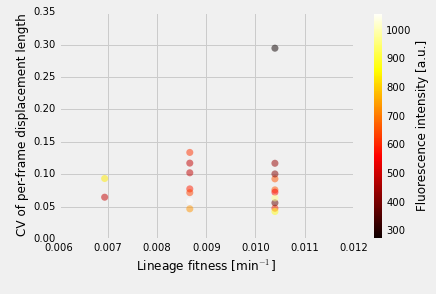

In [76]:
import matplotlib.cm as cm
fig, ax = plt.subplots(1,1)
ax.scatter(lindf.Lineage_Fitness,lindf.Mean_Polar_Displacement, alpha=0.5,c = lindf.Fluorescence_Intensity, cmap =cm.hot,s=50, edgecolor ='None')
corr = lindf.Lineage_Fitness.corr(lindf.CV_Cartesian_Displacement)
corrstder = ((1-(lindf.Lineage_Fitness.corr(lindf.CV_Cartesian_Displacement))**2)/len(lindf))**(0.5)
sm = plt.cm.ScalarMappable(cmap=cm.hot)
sm.set_array(lindf.Fluorescence_Intensity)
plt.colorbar(sm, label = 'Fluorescence intensity [a.u.]')
ax.annotate('R = %.1f'%corr + '±%.1f'%corrstder,  (0.9,0.011))
ax.set_xlabel(r'Lineage fitness [min$^{-1}$]')
ax.set_ylabel("CV of per-frame displacement length")
#ax.grid(False)
axes = plt.gca()
axes.set_xlim([0.006,0.012])
plt.tight_layout()
#plt.show()

fig1 = plt.gcf()
#fig1.savefig(directory+'/Graphs/Total_Analysis/Lineage-ER-CVCart-Scatter.pdf')

/Users/kaito/.pyenv/versions/anaconda3-2.0.1/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


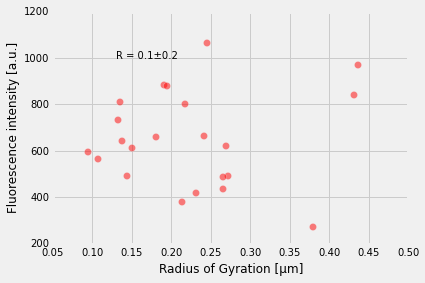

In [77]:
ax = lindf.plot(kind='scatter', x = 'Radius_Gyration', y = 'Fluorescence_Intensity',s=50,alpha=0.5,color = 'red')
corr = lindf.Fluorescence_Intensity.corr(lindf.Radius_Gyration)
corrstder = ((1-(lindf.Fluorescence_Intensity.corr(lindf.Radius_Gyration))**2)/len(lindf))**(0.5)
ax.annotate('R = %.1f'%corr + '±%.1f'%corrstder, (0.13,1000))
ax.set_ylabel('Fluorescence intensity [a.u.]')
ax.set_xlabel("Radius of Gyration [µm]")
#ax.set_xlim([0.03,0.16])
plt.tight_layout()
#plt.savefig(directory+'/Graphs/Total_Analysis/Lineage-Fluor-Meandisp-Scatter.pdf')

/Users/kaito/.pyenv/versions/anaconda3-2.0.1/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


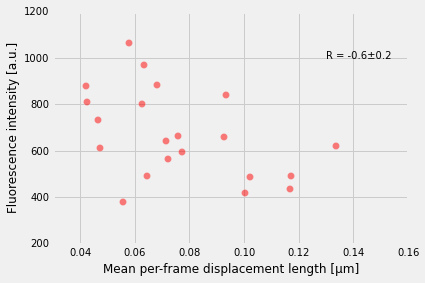

In [78]:
ax = lindf.plot(kind='scatter', x = 'Mean_Polar_Displacement', y = 'Fluorescence_Intensity',s=50,alpha=0.5,color = 'red')
corr = lindf.Fluorescence_Intensity.corr(lindf.Mean_Polar_Displacement)
corrstder = ((1-(lindf.Fluorescence_Intensity.corr(lindf.Mean_Polar_Displacement))**2)/len(lindf))**(0.5)
ax.annotate('R = %.1f'%corr + '±%.1f'%corrstder, (0.13,1000))
ax.set_ylabel('Fluorescence intensity [a.u.]')
ax.set_xlabel("Mean per-frame displacement length [µm]")
ax.set_xlim([0.03,0.16])
plt.tight_layout()
#plt.savefig(directory+'/Graphs/Total_Analysis/Lineage-Fluor-Meandisp-Scatter.pdf')

/Users/kaito/.pyenv/versions/anaconda3-2.0.1/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


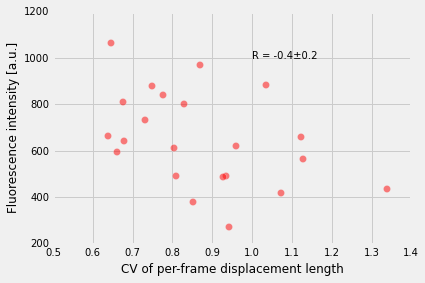

In [79]:
ax = lindf.plot(kind='scatter', x = 'CV_Cartesian_Displacement', y = 'Fluorescence_Intensity',s=50,alpha=0.5,color = 'red')
corr = lindf.Fluorescence_Intensity.corr(lindf.CV_Cartesian_Displacement)
corrstder = ((1-(lindf.Fluorescence_Intensity.corr(lindf.CV_Cartesian_Displacement))**2)/len(lindf))**(0.5)
ax.annotate('R = %.1f'%corr + '±%.1f'%corrstder, (1,1000))
ax.set_ylabel('Fluorescence intensity [a.u.]')
ax.set_xlabel("CV of per-frame displacement length")
plt.tight_layout()
#plt.savefig(directory+'/Graphs/Total_Analysis/Lineage-Fluor-MeanCart-Scatter.pdf')

/Users/kaito/.pyenv/versions/anaconda3-2.0.1/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


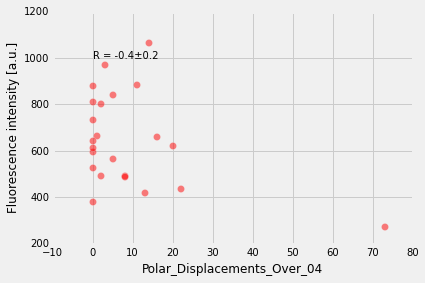

In [177]:
ax = lindf.plot(kind='scatter', x = 'Polar_Displacements_Over_04', y = 'Fluorescence_Intensity',s=50,alpha=0.5,color = 'red')
corr = lindf.Fluorescence_Intensity.corr(lindf.Polar_Displacements_Over_04)
corrstder = ((1-(lindf.Fluorescence_Intensity.corr(lindf.Polar_Displacements_Over_04))**2)/len(lindf))**(0.5)
ax.annotate('R = %.1f'%corr + '±%.1f'%corrstder, (0.13,1000))
ax.set_ylabel('Fluorescence intensity [a.u.]')
#ax.set_xlabel("Mean per-frame displacement length [µm]")
#ax.set_xlim([0.03,0.16])
plt.tight_layout()
#plt.savefig(directory+'/Graphs/Total_Analysis/Lineage-Fluor-Meandisp-Scatter.pdf')

/Users/kaito/.pyenv/versions/anaconda3-2.0.1/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


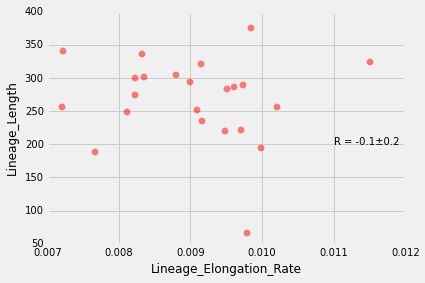

In [176]:
ax = lindf.plot(kind='scatter', x = 'Lineage_Elongation_Rate', y = 'Lineage_Length',s=50,alpha=0.5,color = 'red')
corr = lindf.Lineage_Elongation_Rate.corr(lindf.Lineage_Length)
corrstder = ((1-(lindf.Lineage_Elongation_Rate.corr(lindf.Lineage_Length))**2)/len(lindf))**(0.5)
ax.annotate('R = %.1f'%corr + '±%.1f'%corrstder, (0.011,200))
ax.set_xlim([0.007,0.012])
#ax.set_ylabel('Fluorescence intensity [a.u.]')
#ax.set_xlabel("CV of per-frame displacement length")
plt.tight_layout()

In [80]:
lindf

,ID,Divisions,Lineage_Length,Fluorescence_Intensity,Lineage_Elongation_Rate,Lineage_Fitness,Mean_Cartesian_Displacement,CV_Cartesian_Displacement,Max_Cartesian_Displacement,Mean_Polar_Displacement,CV_Polar_Displacement,SEM_Polar_Displacement,Max_Polar_Displacement,Polar_Displacements_Over_04,Mean_Radius_Gyration,Radius_Gyration
0,pos0A,5,256,594.8,0.007206,0.008664,0.127120,0.660886,0.439208,0.077220,0.804664,0.003884,0.330916,0,0.118721,0.094516
0,pos4A,4,189,491.7,0.007668,0.006931,0.109538,0.935441,0.635400,0.064390,1.053162,0.004933,0.539507,2,0.128465,0.143545
0,pos4B,6,302,662.8,0.008356,0.010397,0.125644,0.637919,0.408543,0.075724,1.168906,0.005093,1.223226,1,0.181635,0.241123
0,pos4C,6,341,566.4,0.007226,0.010397,0.100948,1.126859,1.003188,0.072111,1.403679,0.005481,0.880401,5,0.088136,0.107604
0,pos0B,5,235,492.3,0.009155,0.008664,0.186060,0.810134,1.063081,0.117019,1.131301,0.008636,1.054157,8,0.235520,0.271326
0,pos0C,7,287,812.2,0.009604,0.012130,0.054792,0.675597,0.344851,0.042583,0.683249,0.001717,0.221843,0,0.091543,0.134900
0,pos0F,7,324,884.3,0.011502,0.012130,0.089073,1.035863,0.892525,0.068249,1.222775,0.004636,0.756983,4,0.158649,0.190259
0,pos0G,5,222,640.8,0.009704,0.008664,0.104019,0.678929,0.373574,0.071430,0.733588,0.003517,0.301624,0,0.157749,0.137473
0,pos5A,5,256,733.9,0.010203,0.008664,0.070226,0.732421,0.349791,0.046453,0.713284,0.002071,0.242338,0,0.108744,0.132874
0,pos5J,6,300,659.5,0.008221,0.010397,0.141458,1.123311,1.220458,0.092713,1.284348,0.006875,0.749703,16,0.216895,0.181298


In [81]:
table=pd.DataFrame()
table[r'Mean PDFL [$\mu$m]'] = lindf['Mean_Polar_Displacement'].round(3).apply(str)+' $\pm$ '+lindf['SEM_Polar_Displacement'].round(3).apply(str)
table['CV PDFL'] = lindf['CV_Polar_Displacement'].round(3).apply(str)
table[r'$R_g$ [$\mu$m]'] = lindf['Radius_Gyration'].round(3).apply(str)
table['Fluorescence Intensity [a.u.]'] = lindf['Fluorescence_Intensity'].round(1).apply(str)
table.index = np.arange(1,len(table)+1,1)

In [82]:
print(table.to_latex(escape=False,index=True,longtable=True))

\begin{longtable}{lllll}
\toprule
{} & Mean PDFL [$\mu$m] & CV PDFL & $R_g$ [$\mu$m] & Fluorescence Intensity [a.u.] \\
\midrule
\endhead
\midrule
\multicolumn{3}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
1  &  0.077 $\pm$ 0.004 &   0.805 &          0.095 &                         594.8 \\
2  &  0.064 $\pm$ 0.005 &   1.053 &          0.144 &                         491.7 \\
3  &  0.076 $\pm$ 0.005 &   1.169 &          0.241 &                         662.8 \\
4  &  0.072 $\pm$ 0.005 &   1.404 &          0.108 &                         566.4 \\
5  &  0.117 $\pm$ 0.009 &   1.131 &          0.271 &                         492.3 \\
6  &  0.043 $\pm$ 0.002 &   0.683 &          0.135 &                         812.2 \\
7  &  0.068 $\pm$ 0.005 &   1.223 &           0.19 &                         884.3 \\
8  &  0.071 $\pm$ 0.004 &   0.734 &          0.137 &                         640.8 \\
9  &  0.046 $\pm$ 0.002 &   0.713 &          0.133 &                     

In [6]:
table2=pd.DataFrame()
table2[r'Lineage Elongation Rate [min$^{-1}$]'] = lindf['Lineage_Elongation_Rate'].round(3).apply(str)
table2[r'Lineage Fitness [min$^{-1}$]'] = lindf['Lineage_Fitness'].round(3).apply(str)
table2.index = np.arange(1,len(table2)+1,1)

In [7]:
print(table2.to_latex(escape=False,index=True,longtable=True))

\begin{longtable}{lll}
\toprule
{} & Lineage Elongation Rate [min$^{-1}$] & Lineage Fitness [min$^{-1}$] \\
\midrule
\endhead
\midrule
\multicolumn{3}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
1  &                                0.007 &                        0.009 \\
2  &                                0.008 &                        0.007 \\
3  &                                0.008 &                         0.01 \\
4  &                                0.007 &                         0.01 \\
5  &                                0.009 &                        0.009 \\
6  &                                 0.01 &                        0.012 \\
7  &                                0.012 &                        0.012 \\
8  &                                 0.01 &                        0.009 \\
9  &                                 0.01 &                        0.009 \\
10 &                                0.008 &                         0.01 \\
11 &         